- Name : Riya Wagh
- PRN  : 240340128024
- Date : 17-05-2024

# Image Processing with Neural Network

## Assignment: A03
### Take Neural Network implementation with:
- One hidden layer 
- ${Tanh}$ activation function


### Answers are at the end.

## Import Statements

In [23]:
###-----------------
### Import Libraries
###-----------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## Setup Global Parameters

In [24]:
###----------------
### Some parameters
###----------------

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2 # The random/undpredicted fluctuations generated during generation of dataset (Noise can degrade the performance also as well as can improve the robustness also) 
EPOCHS = 5000 # number of epochs - The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
ALPHA = 0.1  # learning rate
N_SAMPLES = 10000
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

## Generate Data Set
<div style="font-family: Arial; font-size:1.2em;">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [25]:
# make_moon is a in-built library which generates two class classification dataset

X, y = datasets.make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.03690626, -0.22451215],
        [ 0.05960204,  0.79696224],
        [-1.1379158 ,  0.42750961],
        [-1.10581598,  0.63409829],
        [ 1.20375936,  0.40839427]]),
 array([1, 0, 0, 0, 0], dtype=int64))

## Visualization
<p style="font-family: Arial; font-size:1.2em">
DataFrames are easier to visualize
</p>

In [26]:
data_df = pd.DataFrame(X, columns = ['A', 'B'])

data_df['target'] = y

data_df.head()

,A,B,target
0,0.036906,-0.224512,1
1,0.059602,0.796962,0
2,-1.137916,0.427510,0
3,-1.105816,0.634098,0
4,1.203759,0.408394,0


In [27]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       10000 non-null  float64
 1   B       10000 non-null  float64
 2   target  10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [28]:
data_df.describe() # Generate descriptive statistic

,A,B,target
count,10000.000000,10000.000000,10000.000000
mean,0.500318,0.248263,0.500000
std,0.890336,0.531641,0.500025
min,-1.583156,-1.113837,0.000000
25%,-0.123932,-0.188945,0.000000
50%,0.501754,0.247674,0.500000
75%,1.116160,0.688760,1.000000
max,2.576390,1.699244,1.000000


In [29]:
# what labels are present?
data_df.target.unique()

array([1, 0], dtype=int64)

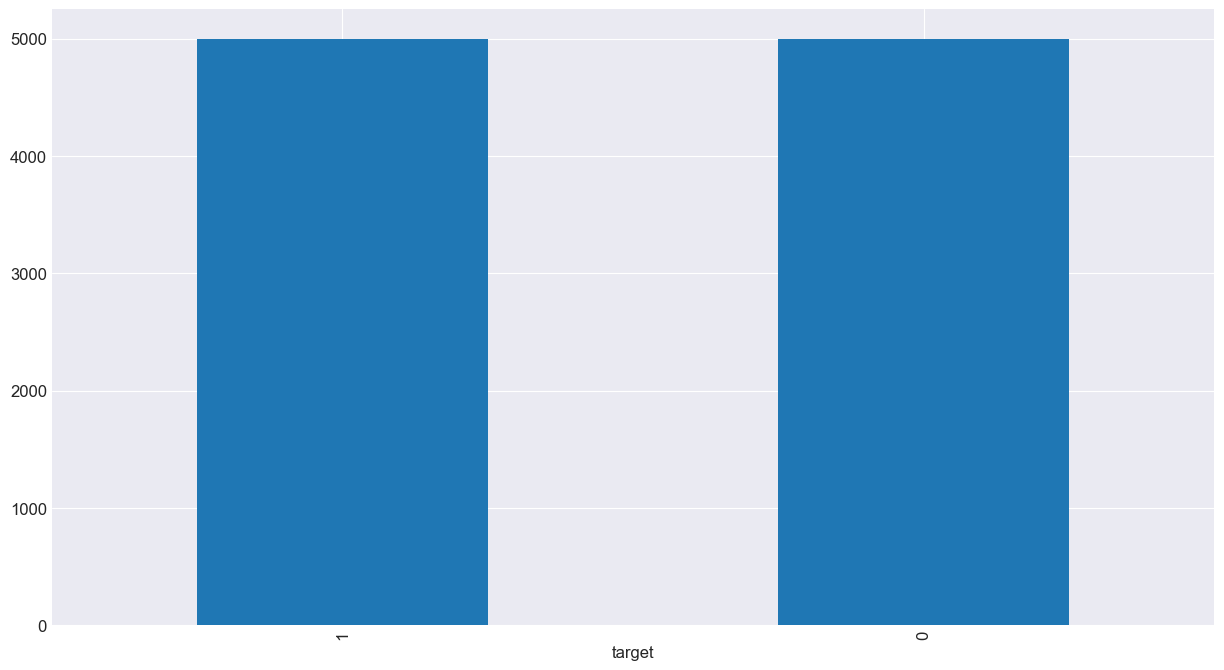

In [30]:
fig, ax = plt.subplots() # Instantiate
    
data_df['target'].value_counts().plot(ax=ax, kind='bar');

### Different ways of plotting data

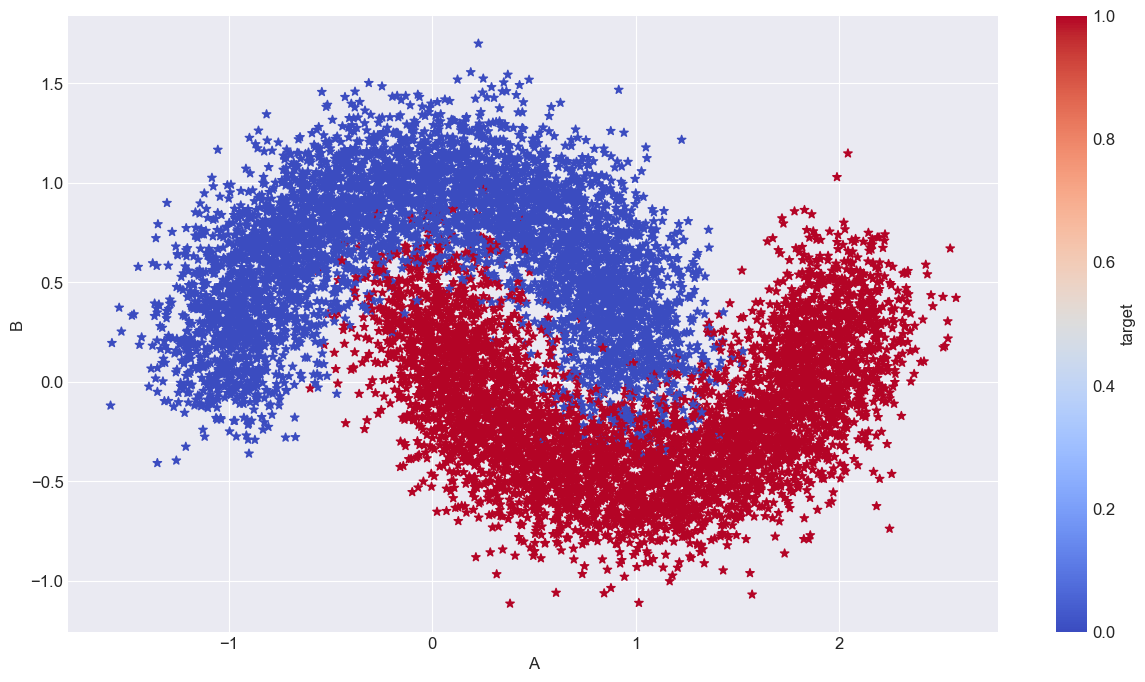

In [31]:
# Plot the data
data_df.plot.scatter('A', 'B',      # columns to plot (x=A, y=B)
                     s = 40,        # size of the marker
                     marker = '*',  # type of marker
                     c = 'target',  # color as per target column
                     cmap=CMAP);    # using colormap

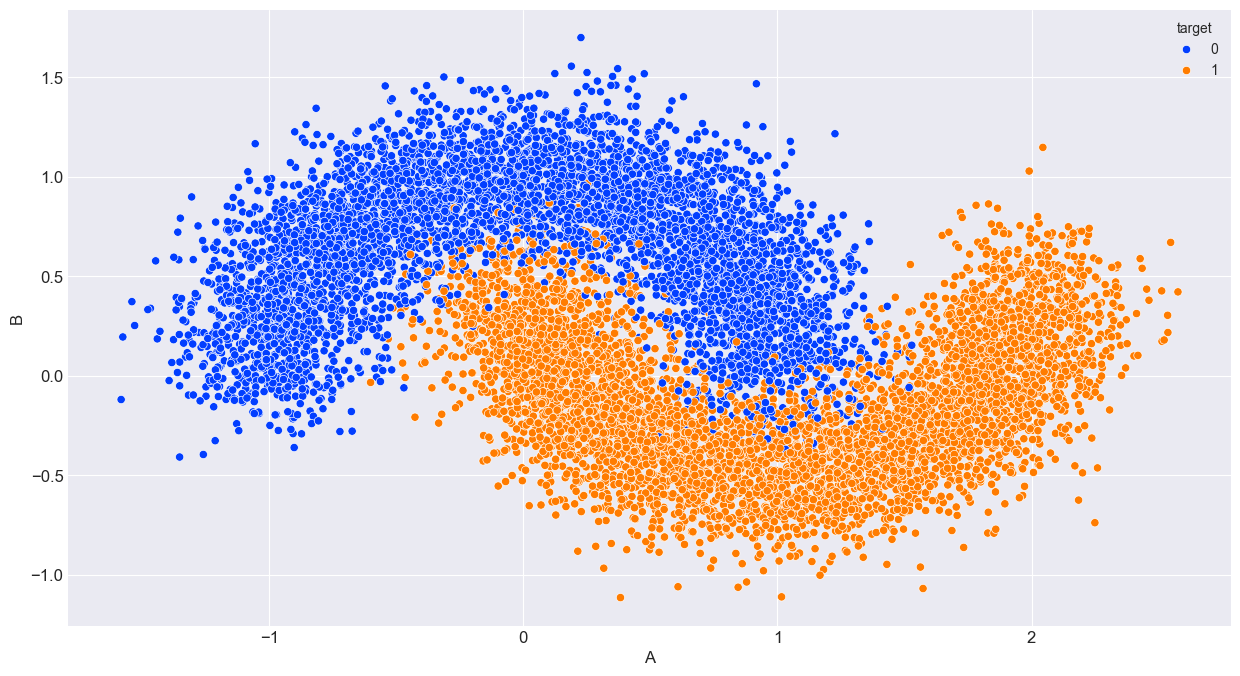

In [32]:
# Using Seaborn
ax = sns.scatterplot(data=data_df, # data from dataframe
                     x='A', y='B',  # X axis and y axis columns
                     palette=sns.color_palette("bright", 2), # color map
                    hue='target'); # Color as per target column

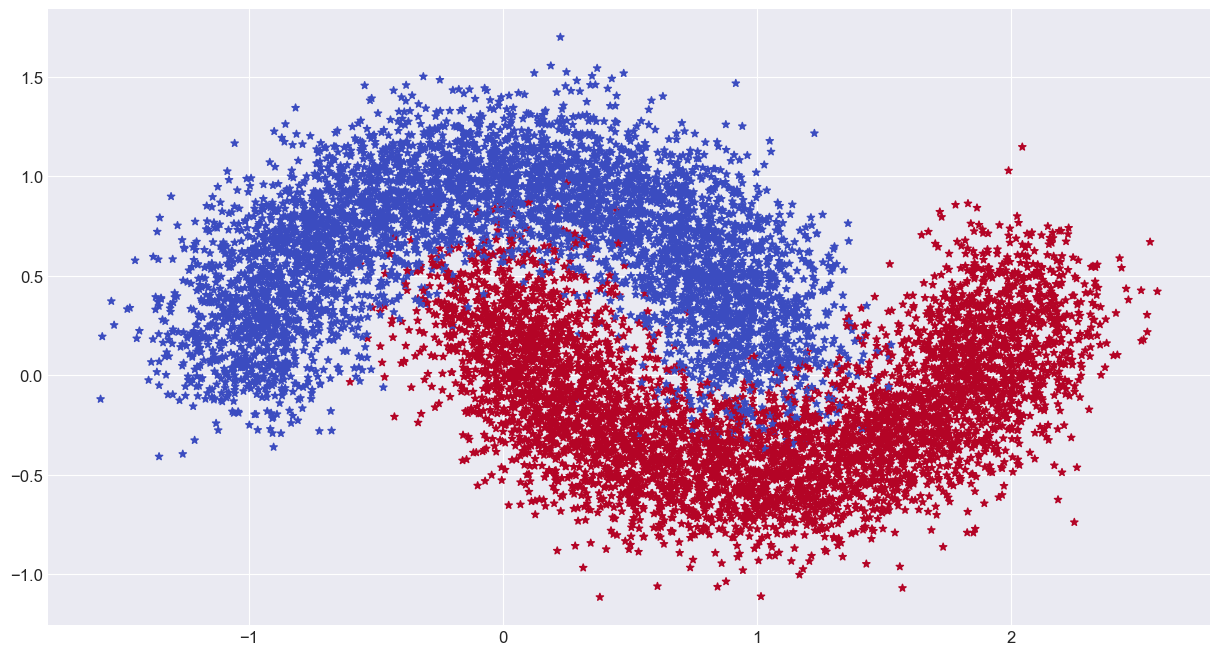

In [33]:
#### In case you want to plot X Array directly
plt.scatter(X[:,0], X[:,1], s=30, c=y, marker = '*', cmap=CMAP);

In [34]:
features_df = data_df.drop('target', axis=1)

labels = data_df['target']

X_train, X_test, y_train, y_test = train_test_split(features_df, 
                                                    labels, 
                                                    test_size = TEST_SIZE, 
                                                    random_state=RANDOM_STATE, 
                                                    stratify=labels)

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [35]:
print(X_train.shape, y_train.shape)
print(X_test.shape)

(8000, 2) (8000,)
(2000, 2)


In [36]:
type(X_train), type(X_test)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [37]:
def sigmoid(z):
    return 1 / ( 1 + np.exp ( -z ) )

In [38]:
def fn_activ(z): # g(z)
    return np.tanh(z)

def fn_activ_prime(a): # g'(z)
    return 1. - np.tanh(a)**2

In [39]:
def predict(model, X_p):
    
    W1 = model['W1']
    W2 = model['W2']
    b1 = model['b1']
    b2 = model['b2']
    
    # Forward Propagation
        
    # Layer - 1
    
    z1 = X_p.dot(W1) + b1 # Aggregation Function
    a1 = fn_activ(z1) # Activation Function
    
    # Layer - 2
    
    z2 = a1.dot(W2) + b2 # Aggregation Function
    a2 = sigmoid(z2) # Activation Function
        
    return a2 >= 0.5 # It will return 0 (False) and 1 (True) for condition mentioned i.e. 'a2>=0.5'

In [40]:
def calculate_loss(model, X_l, y_l):
    
    W1 = model['W1']
    W2 = model['W2']
    b1 = model['b1']
    b2 = model['b2']
    
    m = X_l.shape[0]
    
    # Layer - 1
    
    z1 = X_l.dot(W1) + b1 # Aggregation Function
    a1 = fn_activ(z1) # Activation Function
    
    # Layer - 2
    
    z2 = a1.dot(W2) + b2 # Aggregation Function
    a2 = sigmoid(z2) # Activation Function
    
    data_loss = -(y_l*np.log(a2)).sum() # Binary
        
    return data_loss / m

In [41]:
# Stochastic Gradient Descent

# No. of features is fixed, Hence Input shape is Fixed
# No. of Output is fixed, Hence Output shape is Fixed

def build_model(X_train, y_train, nn_hdim, nn_out, epochs=EPOCHS, alpha=ALPHA):
    
    '''
    Args: 
    
        'X_train':Training features, 
        'y_train':Training labels, 
        'nn_out':Size of Output,
        'nn_hdim':No. of nodes in hidden layer
    '''
    m, nn_input_dim = X_train.shape
    nn_output_dim = nn_out
    
    W1 = rng.random((nn_input_dim,nn_hdim), 
             dtype=np.float32) / np.sqrt(nn_input_dim)  # This line will be explained after 2-3 lectures, Today's Dt. 16/05/24 
    
    W2 = rng.random((nn_hdim, nn_output_dim), 
             dtype=np.float32) / np.sqrt(nn_hdim)
    
    b1 = np.zeros((1, nn_hdim), dtype=np.float32)
    b2 = np.zeros((1, nn_output_dim), dtype=np.float32)
    
    curr_loss = 0
    
    loss,epoch = [], []
    
    for i in range(0,epochs):
        
        # Forward Propagation
        
        # Layer - 1
        
        z1 = X_train.dot(W1) + b1
        a1 = fn_activ(z1)
        
        # Layer - 2
        
        z2 = a1.dot(W2) + b2
        a2 = sigmoid(z2)
        
        # Backward Propagation
        
        assert(a2.shape == y_train.shape), f'check y {a2.shape}/{y_train.shape}'
        dz2 = a2 - y_train # Remember: a2 & y dimensions need to be same
        
        dW2 = (a1.T).dot(dz2)
        assert(W2.shape == dW2.shape), f'check W2 {W2.shape}/{dW2.shape}'
        
        db2 = np.sum(dz2, axis = 0, keepdims=True)
        assert(b2.shape == db2.shape), f'check b2 {b2.shape}/{db2.shape}'
        
        da1 = dz2.dot(W2.T)
        assert(a1.shape == da1.shape), f'check a2 {a1.shape}/{da1.shape}'
        
        # Layer - 1
        
        dz1 = da1 * fn_activ_prime(z1)
        assert(z1.shape == dz1.shape), f'check a2 {z1.shape}/{dz1.shape}'
        
        dW1 = (X_train.T).dot(dz1)
        assert(W1.shape == dW1.shape), f'check W1 {W1.shape}/{dW1.shape}'
        
        db1 = np.sum(dz1, axis = 0, keepdims=True)
        assert(b1.shape == db1.shape), f'check b1 {b1.shape}/{db1.shape}'
        
        # Gradient Update
        
        W1 += -alpha * dW1 / m
        b1 += -alpha * db1 / m
        
        W2 += -alpha * dW2 / m
        b2 += -alpha * db2 / m
        
        model = {'W1':W1, 'b1':b1, 
                 'W2':W2, 'b2':b2}
    
        curr_loss = calculate_loss(model , X_train, y_train)
        loss.append(curr_loss)
        
        epoch.append(i)
        
        if i%100 == 0:
            print(f'After epochs:{i:3d}; loss: {curr_loss: .5f}')
    
    loss_hist['epoch']= epoch
    loss_hist['loss']= loss
    
    return model

In [42]:
loss_hist = {}


In [43]:
print(y_train.shape)
y_train = y_train.reshape(-1,1)
print(y_train.shape)

(8000,)
(8000, 1)


In [44]:
nn_output_dim = 1

model = build_model(X_train, y_train, 50, nn_output_dim)

After epochs:  0; loss:  0.21818
After epochs:100; loss:  0.17289
After epochs:200; loss:  0.15283
After epochs:300; loss:  0.14790
After epochs:400; loss:  0.14610
After epochs:500; loss:  0.14506
After epochs:600; loss:  0.14419
After epochs:700; loss:  0.14329
After epochs:800; loss:  0.14219
After epochs:900; loss:  0.14075
After epochs:1000; loss:  0.13879
After epochs:1100; loss:  0.13608
After epochs:1200; loss:  0.13241
After epochs:1300; loss:  0.12765
After epochs:1400; loss:  0.12188
After epochs:1500; loss:  0.11539
After epochs:1600; loss:  0.10859
After epochs:1700; loss:  0.10189
After epochs:1800; loss:  0.09559
After epochs:1900; loss:  0.08987
After epochs:2000; loss:  0.08478
After epochs:2100; loss:  0.08031
After epochs:2200; loss:  0.07642
After epochs:2300; loss:  0.07303
After epochs:2400; loss:  0.07009
After epochs:2500; loss:  0.06753
After epochs:2600; loss:  0.06529
After epochs:2700; loss:  0.06333
After epochs:2800; loss:  0.06160
After epochs:2900; loss:

In [45]:
model

{'W1': array([[ 0.37001324, -0.44111887,  1.3114194 , -0.4078952 ,  0.6212666 ,
          0.450133  , -0.11622067,  0.42276344,  0.21060689,  0.43191928,
          0.47300178,  0.5881853 ,  0.42977837,  0.6600917 ,  0.38107452,
         -0.41704497,  0.44537166,  2.6414268 ,  0.42709124,  0.4873985 ,
          0.26134005,  0.9443926 ,  0.5980765 ,  0.43997234,  0.44729567,
          0.5645326 ,  0.43475893,  0.4103803 ,  0.4470222 ,  0.8389275 ,
         -0.44764465,  0.44049552,  0.7844719 ,  0.27793565,  0.4483455 ,
          0.43199915, -0.44676572, -0.41941065,  0.46933317, -0.43632388,
         -0.40561646,  0.44246298, -0.4488698 , -0.4326542 ,  3.9543424 ,
          0.8037019 ,  0.62201273,  0.4147491 ,  0.7675979 , -0.44149235],
        [ 0.17697337,  0.48771715,  0.75079167,  0.5337443 ,  0.44511437,
         -0.2962272 ,  0.30309764,  0.06580706,  0.6097537 ,  0.07310778,
          0.52817965,  0.8588437 ,  0.36385298,  0.23427713,  0.16520737,
          0.3146295 , -0.094686

<Axes: xlabel='epoch'>

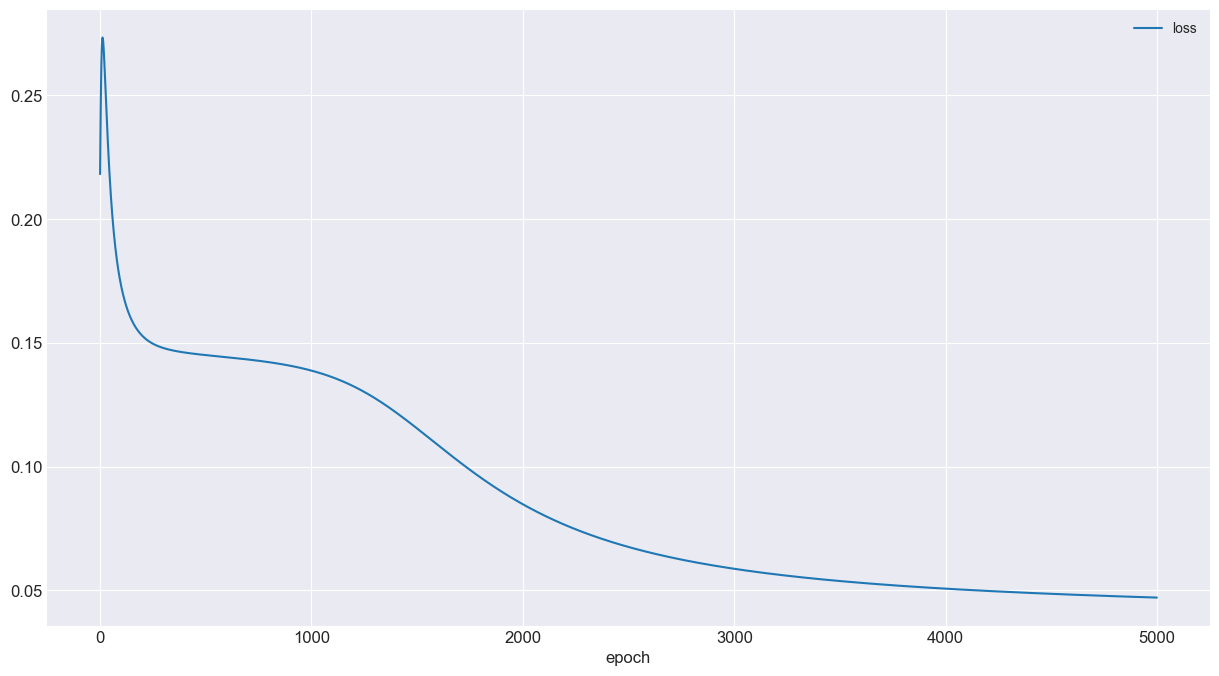

In [46]:
pd.DataFrame(loss_hist).plot(x='epoch')

In [47]:
y_pred = predict(model, X_train)
accuracy_score(y_train,y_pred)

0.96625

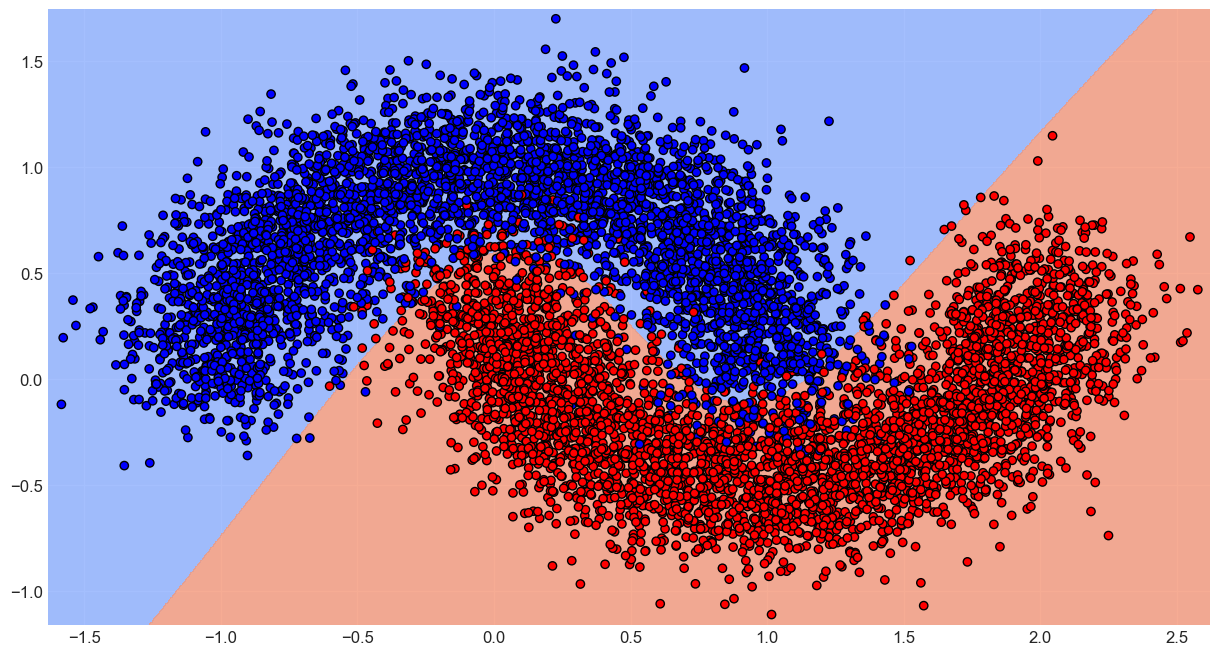

In [48]:
X = X_train
fig,ax = plt.subplots()
dm =0.005 # Grid Spacing
x_min , x_max = X[:,0].min() - 0.05 , X[:, 0].max() + 0.05
y_min , y_max = X[:,1].min() - 0.05 , X[:, 1].max() + 0.05

# np.meshagrid(): Return a list of coordinate matrices from coordinate vectors.
xx , yy  = np.meshgrid(np.arange(x_min,x_max,dm),
                       np.arange(y_min,y_max,dm))

#.c_: Translates slice objects to concatenation along the second axis.
XX = np.c_[xx.ravel(),yy.ravel()]

# np.hstack(): Stack arrays in sequence horizontally (column wise).
# XX = np.hstack((XX, np.ones((XX.shape[0] , 1))))

y_pred = predict(model, XX)

# for row in XX:
#     pred = predict(model , XX)
#     y_pred.append(np.round(pred))
z = np.array(y_pred).reshape(xx.shape)

ax.contourf(xx,yy,z ,cmap = CMAP , alpha =0.8)
ax.scatter(X[:,0], X[:,1], c=y_train, edgecolors='k', cmap=plt.cm.bwr)

In [49]:
y_pred = predict(model, X_test)
accuracy_score(y_test,y_pred)

0.9705

In [50]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[974,  26],
       [ 33, 967]], dtype=int64)

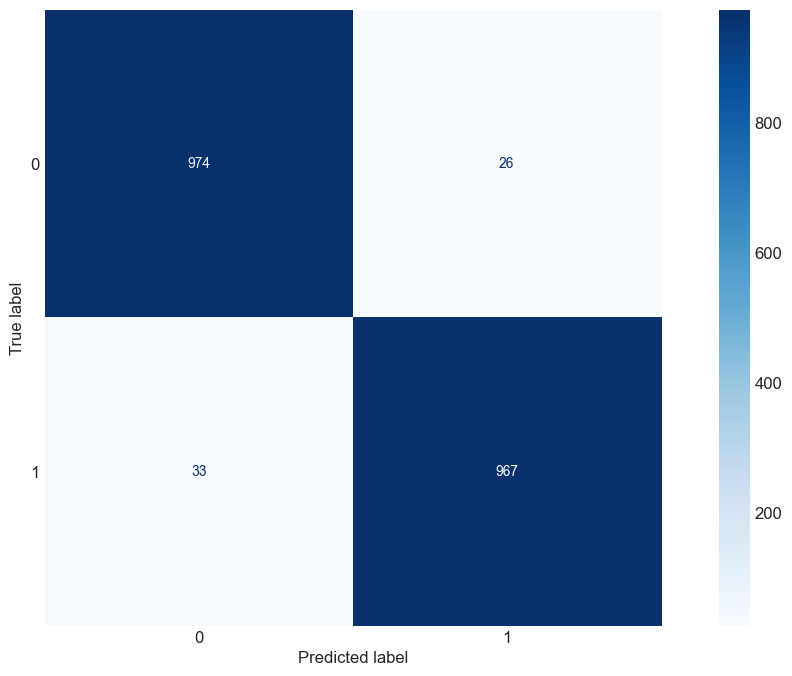

In [51]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [0,1])

fig, ax = plt.subplots()

disp.plot(ax=ax, cmap='Blues')

ax.grid(False)

### Assignment - Answer all Questions

- **Q1**: Is this model more accurate compared to previous model?

Test Case #8 can give sight better result than our Base Case (i.e. Test Case #1). 

Specification Comparison:

|#|Dimension of hidden layer|Learning rate|Training Accuracy|Test Accuracy|
|:-:|:-:|:-:|:-:|:-:|
|1|4|0.1|0.9825|0.965|Base case||1|4|0.1|0.97|0.96|
|8|20|0.5|0.98375|0.965|

- **Q2**: Prepare table by changing number of neurons in hidden layer, learning rate and observe change in results. Also comment on your results.

|#|Dimension of hidden layer|Learning rate|Training Accuracy|Test Accuracy|Comment|
|:-:|:-:|:-:|:-:|:-:|:--|
|1|4|0.1|0.9825|0.965|Base case||1|4|0.1|0.97|0.96|Base case|
|2|1|1|0.86875|0.87|Few neurons, lower accuracy|
|3|2|0.5|0.87|0.86|Limited neurons, modest accuracy|
|4|3|0.75|0.98125|0.965|Moderate neurons, good accuracy|
|5|5|0.6|0.9825|0.965|Increased neurons, maintained accuracy|
|6|10|0.99|0.9825|0.965|Many neurons, preserved accuracy, risk of instability|
|7|20|0.1|0.9775|0.965|Many neurons, slightly lower accuracy|
|8|20|0.5|0.98375|0.965|Many neurons, slightly higher accuracy|
|9|20|0.99|0.98375|0.96|Many neurons, risk of overfitting|
|10|20|1|0.9775|0.965|Many neurons, similar accuracy to base case|
|11|50|1|0.97875|0.96|High neurons, potential overfitting indicated|

- **Q3**: What lines will you change to convert it into multi-class prediction model?

To convert this model into a multi-class prediction model, we would need to make the following changes:

- Change the activation function of the output layer to tanh instead of sigmoid.
- Ensure the output layer has as many neurons as the number of classes.

- **Q4**: How many epochs are sufficient?

It depends on various factors like:

- **Dataset Size**: Dataset Size can be directly proportional to # of Epochs.

- **Model Complexity**: Same like Dataset Size, directly proportional to # of Epochs.

- **Learning Rate**: The choice of learning rate can affect the number of epochs required. A higher learning rate might converge faster but can risk overshooting minima and can result into divergence, while a lower learning rate may require more epochs for convergence.

- **Task Objective**: Nature of task i.e Supervised, Unsupervised Tasks, GAN Tasks, etc...